# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.exclude_past, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 13005 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.exclude_past, max_distance=2)


  0% (    1 of 13005) |                   | Elapsed Time: 0:00:03 ETA:  13:41:03

  0% (   92 of 13005) |                    | Elapsed Time: 0:00:04 ETA:  0:02:19

  1% (  163 of 13005) |                    | Elapsed Time: 0:00:05 ETA:  0:02:10

  2% (  280 of 13005) |                    | Elapsed Time: 0:00:06 ETA:  0:01:59

  2% (  326 of 13005) |                    | Elapsed Time: 0:00:06 ETA:  0:01:59

  3% (  431 of 13005) |                    | Elapsed Time: 0:00:07 ETA:  0:01:58

  3% (  488 of 13005) |                    | Elapsed Time: 0:00:08 ETA:  0:01:57

  4% (  597 of 13005) |                    | Elapsed Time: 0:00:09 ETA:  0:01:55

  5% (  651 of 13005) |#                   | Elapsed Time: 0:00:10 ETA:  0:01:55

  5% (  744 of 13005) |#                   | Elapsed Time: 0:00:11 ETA:  0:01:56

  6% (  813 of 13005) |#                   | Elapsed Time: 0:00:11 ETA:  0:01:51

  7% (  925 of 13005) |#                   | Elapsed Time: 0:00:12 ETA:  0:01:49

  7% (  976 of 13005) |#                   | Elapsed Time: 0:00:13 ETA:  0:01:50

  8% ( 1083 of 13005) |#                   | Elapsed Time: 0:00:14 ETA:  0:01:48

  8% ( 1138 of 13005) |#                   | Elapsed Time: 0:00:14 ETA:  0:01:47

  9% ( 1243 of 13005) |#                   | Elapsed Time: 0:00:15 ETA:  0:01:46

 10% ( 1301 of 13005) |##                  | Elapsed Time: 0:00:16 ETA:  0:01:51

 10% ( 1405 of 13005) |##                  | Elapsed Time: 0:00:17 ETA:  0:01:50

 11% ( 1464 of 13005) |##                  | Elapsed Time: 0:00:18 ETA:  0:01:47

 12% ( 1571 of 13005) |##                  | Elapsed Time: 0:00:19 ETA:  0:01:47

 12% ( 1626 of 13005) |##                  | Elapsed Time: 0:00:19 ETA:  0:01:47

 13% ( 1736 of 13005) |##                  | Elapsed Time: 0:00:20 ETA:  0:01:45

 13% ( 1789 of 13005) |##                  | Elapsed Time: 0:00:20 ETA:  0:01:45

 14% ( 1890 of 13005) |##                  | Elapsed Time: 0:00:21 ETA:  0:01:45

 15% ( 1951 of 13005) |###                 | Elapsed Time: 0:00:22 ETA:  0:01:44

 15% ( 2052 of 13005) |###                 | Elapsed Time: 0:00:23 ETA:  0:01:38

 16% ( 2114 of 13005) |###                 | Elapsed Time: 0:00:24 ETA:  0:01:36

 17% ( 2231 of 13005) |###                 | Elapsed Time: 0:00:25 ETA:  0:01:34

 17% ( 2276 of 13005) |###                 | Elapsed Time: 0:00:25 ETA:  0:01:33

 18% ( 2396 of 13005) |###                 | Elapsed Time: 0:00:26 ETA:  0:01:31

 18% ( 2439 of 13005) |###                 | Elapsed Time: 0:00:26 ETA:  0:01:29

 19% ( 2564 of 13005) |###                 | Elapsed Time: 0:00:27 ETA:  0:01:26

 20% ( 2601 of 13005) |####                | Elapsed Time: 0:00:28 ETA:  0:01:25

 20% ( 2718 of 13005) |####                | Elapsed Time: 0:00:29 ETA:  0:01:23

 21% ( 2764 of 13005) |####                | Elapsed Time: 0:00:29 ETA:  0:01:20

 22% ( 2880 of 13005) |####                | Elapsed Time: 0:00:30 ETA:  0:01:19

 22% ( 2927 of 13005) |####                | Elapsed Time: 0:00:30 ETA:  0:01:19

 23% ( 3036 of 13005) |####                | Elapsed Time: 0:00:31 ETA:  0:01:19

 23% ( 3089 of 13005) |####                | Elapsed Time: 0:00:32 ETA:  0:01:27

 24% ( 3206 of 13005) |####                | Elapsed Time: 0:00:33 ETA:  0:01:25

 25% ( 3252 of 13005) |#####               | Elapsed Time: 0:00:34 ETA:  0:01:27

 25% ( 3369 of 13005) |#####               | Elapsed Time: 0:00:35 ETA:  0:01:24

 26% ( 3414 of 13005) |#####               | Elapsed Time: 0:00:35 ETA:  0:01:24

 27% ( 3528 of 13005) |#####               | Elapsed Time: 0:00:36 ETA:  0:01:23

 27% ( 3577 of 13005) |#####               | Elapsed Time: 0:00:37 ETA:  0:01:24

 28% ( 3691 of 13005) |#####               | Elapsed Time: 0:00:38 ETA:  0:01:23

 28% ( 3739 of 13005) |#####               | Elapsed Time: 0:00:38 ETA:  0:01:22

 29% ( 3833 of 13005) |#####               | Elapsed Time: 0:00:39 ETA:  0:01:17

 30% ( 3902 of 13005) |######              | Elapsed Time: 0:00:40 ETA:  0:01:17

 30% ( 4014 of 13005) |######              | Elapsed Time: 0:00:41 ETA:  0:01:16

 31% ( 4065 of 13005) |######              | Elapsed Time: 0:00:41 ETA:  0:01:16

 32% ( 4177 of 13005) |######              | Elapsed Time: 0:00:42 ETA:  0:01:15

 32% ( 4227 of 13005) |######              | Elapsed Time: 0:00:42 ETA:  0:01:15

 33% ( 4336 of 13005) |######              | Elapsed Time: 0:00:43 ETA:  0:01:14

 33% ( 4390 of 13005) |######              | Elapsed Time: 0:00:44 ETA:  0:01:14

 34% ( 4508 of 13005) |######              | Elapsed Time: 0:00:45 ETA:  0:01:12

 35% ( 4552 of 13005) |#######             | Elapsed Time: 0:00:45 ETA:  0:01:09

 35% ( 4671 of 13005) |#######             | Elapsed Time: 0:00:46 ETA:  0:01:07

 36% ( 4715 of 13005) |#######             | Elapsed Time: 0:00:47 ETA:  0:01:06

 37% ( 4829 of 13005) |#######             | Elapsed Time: 0:00:48 ETA:  0:01:05

 37% ( 4877 of 13005) |#######             | Elapsed Time: 0:00:48 ETA:  0:01:04

 38% ( 4995 of 13005) |#######             | Elapsed Time: 0:00:49 ETA:  0:01:02

 38% ( 5040 of 13005) |#######             | Elapsed Time: 0:00:50 ETA:  0:01:01

 39% ( 5146 of 13005) |#######             | Elapsed Time: 0:00:51 ETA:  0:01:02

 40% ( 5202 of 13005) |########            | Elapsed Time: 0:00:51 ETA:  0:01:03

 40% ( 5317 of 13005) |########            | Elapsed Time: 0:00:52 ETA:  0:01:02

 41% ( 5365 of 13005) |########            | Elapsed Time: 0:00:53 ETA:  0:01:02

 41% ( 5448 of 13005) |########            | Elapsed Time: 0:00:54 ETA:  0:01:10

 42% ( 5528 of 13005) |########            | Elapsed Time: 0:00:54 ETA:  0:01:09

 43% ( 5636 of 13005) |########            | Elapsed Time: 0:00:55 ETA:  0:01:09

 43% ( 5690 of 13005) |########            | Elapsed Time: 0:00:56 ETA:  0:01:11

 44% ( 5797 of 13005) |########            | Elapsed Time: 0:00:57 ETA:  0:01:10

 45% ( 5853 of 13005) |#########           | Elapsed Time: 0:00:58 ETA:  0:01:10

 45% ( 5974 of 13005) |#########           | Elapsed Time: 0:00:59 ETA:  0:01:06

 46% ( 6015 of 13005) |#########           | Elapsed Time: 0:00:59 ETA:  0:01:07

 47% ( 6127 of 13005) |#########           | Elapsed Time: 0:01:00 ETA:  0:01:06

 47% ( 6178 of 13005) |#########           | Elapsed Time: 0:01:00 ETA:  0:00:57

 48% ( 6294 of 13005) |#########           | Elapsed Time: 0:01:01 ETA:  0:00:55

 48% ( 6340 of 13005) |#########           | Elapsed Time: 0:01:02 ETA:  0:00:54

 49% ( 6449 of 13005) |#########           | Elapsed Time: 0:01:03 ETA:  0:00:53

 50% ( 6503 of 13005) |##########          | Elapsed Time: 0:01:03 ETA:  0:00:51

 50% ( 6620 of 13005) |##########          | Elapsed Time: 0:01:04 ETA:  0:00:48

 51% ( 6666 of 13005) |##########          | Elapsed Time: 0:01:05 ETA:  0:00:49

 52% ( 6785 of 13005) |##########          | Elapsed Time: 0:01:06 ETA:  0:00:47

 52% ( 6828 of 13005) |##########          | Elapsed Time: 0:01:06 ETA:  0:00:47

 53% ( 6933 of 13005) |##########          | Elapsed Time: 0:01:07 ETA:  0:00:47

 53% ( 6991 of 13005) |##########          | Elapsed Time: 0:01:08 ETA:  0:00:47

 54% ( 7112 of 13005) |##########          | Elapsed Time: 0:01:09 ETA:  0:00:45

 55% ( 7153 of 13005) |###########         | Elapsed Time: 0:01:09 ETA:  0:00:45

 55% ( 7266 of 13005) |###########         | Elapsed Time: 0:01:10 ETA:  0:00:44

 56% ( 7316 of 13005) |###########         | Elapsed Time: 0:01:10 ETA:  0:00:43

 57% ( 7439 of 13005) |###########         | Elapsed Time: 0:01:11 ETA:  0:00:41

 57% ( 7478 of 13005) |###########         | Elapsed Time: 0:01:12 ETA:  0:00:41

 58% ( 7587 of 13005) |###########         | Elapsed Time: 0:01:13 ETA:  0:00:41

 58% ( 7641 of 13005) |###########         | Elapsed Time: 0:01:13 ETA:  0:00:39

 59% ( 7751 of 13005) |###########         | Elapsed Time: 0:01:14 ETA:  0:00:38

 60% ( 7803 of 13005) |############        | Elapsed Time: 0:01:15 ETA:  0:00:39

 60% ( 7920 of 13005) |############        | Elapsed Time: 0:01:16 ETA:  0:00:37

 61% ( 7966 of 13005) |############        | Elapsed Time: 0:01:16 ETA:  0:00:36

 62% ( 8078 of 13005) |############        | Elapsed Time: 0:01:17 ETA:  0:00:35

 62% ( 8129 of 13005) |############        | Elapsed Time: 0:01:17 ETA:  0:00:36

 63% ( 8233 of 13005) |############        | Elapsed Time: 0:01:18 ETA:  0:00:37

 63% ( 8291 of 13005) |############        | Elapsed Time: 0:01:19 ETA:  0:00:35

 64% ( 8408 of 13005) |############        | Elapsed Time: 0:01:20 ETA:  0:00:33

 65% ( 8454 of 13005) |#############       | Elapsed Time: 0:01:20 ETA:  0:00:32

 65% ( 8529 of 13005) |#############       | Elapsed Time: 0:01:22 ETA:  0:00:41

 66% ( 8616 of 13005) |#############       | Elapsed Time: 0:01:22 ETA:  0:00:42

 67% ( 8730 of 13005) |#############       | Elapsed Time: 0:01:23 ETA:  0:00:41

 67% ( 8779 of 13005) |#############       | Elapsed Time: 0:01:24 ETA:  0:00:41

 68% ( 8893 of 13005) |#############       | Elapsed Time: 0:01:25 ETA:  0:00:39

 68% ( 8941 of 13005) |#############       | Elapsed Time: 0:01:25 ETA:  0:00:38

 69% ( 9060 of 13005) |#############       | Elapsed Time: 0:01:26 ETA:  0:00:36

 70% ( 9104 of 13005) |##############      | Elapsed Time: 0:01:27 ETA:  0:00:36

 70% ( 9223 of 13005) |##############      | Elapsed Time: 0:01:28 ETA:  0:00:34

 71% ( 9267 of 13005) |##############      | Elapsed Time: 0:01:28 ETA:  0:00:25

 72% ( 9380 of 13005) |##############      | Elapsed Time: 0:01:29 ETA:  0:00:23

 72% ( 9429 of 13005) |##############      | Elapsed Time: 0:01:29 ETA:  0:00:22

 73% ( 9539 of 13005) |##############      | Elapsed Time: 0:01:30 ETA:  0:00:22

 73% ( 9592 of 13005) |##############      | Elapsed Time: 0:01:31 ETA:  0:00:22

 74% ( 9707 of 13005) |##############      | Elapsed Time: 0:01:32 ETA:  0:00:21

 75% ( 9754 of 13005) |###############     | Elapsed Time: 0:01:32 ETA:  0:00:21

 75% ( 9872 of 13005) |###############     | Elapsed Time: 0:01:33 ETA:  0:00:20

 76% ( 9917 of 13005) |###############     | Elapsed Time: 0:01:34 ETA:  0:00:20

 77% (10020 of 13005) |###############     | Elapsed Time: 0:01:35 ETA:  0:00:20

 77% (10079 of 13005) |###############     | Elapsed Time: 0:01:35 ETA:  0:00:19

 78% (10197 of 13005) |###############     | Elapsed Time: 0:01:36 ETA:  0:00:18

 78% (10242 of 13005) |###############     | Elapsed Time: 0:01:37 ETA:  0:00:17

 79% (10351 of 13005) |###############     | Elapsed Time: 0:01:38 ETA:  0:00:17

 80% (10404 of 13005) |################    | Elapsed Time: 0:01:38 ETA:  0:00:16

 80% (10515 of 13005) |################    | Elapsed Time: 0:01:39 ETA:  0:00:15

 81% (10567 of 13005) |################    | Elapsed Time: 0:01:40 ETA:  0:00:16

 82% (10669 of 13005) |################    | Elapsed Time: 0:01:41 ETA:  0:00:17

 82% (10730 of 13005) |################    | Elapsed Time: 0:01:41 ETA:  0:00:16

 83% (10833 of 13005) |################    | Elapsed Time: 0:01:42 ETA:  0:00:16

 83% (10892 of 13005) |################    | Elapsed Time: 0:01:43 ETA:  0:00:17

 84% (10991 of 13005) |################    | Elapsed Time: 0:01:44 ETA:  0:00:18

 85% (11055 of 13005) |#################   | Elapsed Time: 0:01:44 ETA:  0:00:17

 85% (11172 of 13005) |#################   | Elapsed Time: 0:01:45 ETA:  0:00:15

 86% (11217 of 13005) |#################   | Elapsed Time: 0:01:46 ETA:  0:00:15

 87% (11315 of 13005) |#################   | Elapsed Time: 0:01:47 ETA:  0:00:15

 87% (11380 of 13005) |#################   | Elapsed Time: 0:01:47 ETA:  0:00:13

 88% (11490 of 13005) |#################   | Elapsed Time: 0:01:48 ETA:  0:00:12

 88% (11542 of 13005) |#################   | Elapsed Time: 0:01:49 ETA:  0:00:10

 89% (11655 of 13005) |#################   | Elapsed Time: 0:01:50 ETA:  0:00:09

 90% (11705 of 13005) |##################  | Elapsed Time: 0:01:50 ETA:  0:00:09

 90% (11826 of 13005) |##################  | Elapsed Time: 0:01:51 ETA:  0:00:06

 91% (11868 of 13005) |##################  | Elapsed Time: 0:01:52 ETA:  0:00:07

 92% (11988 of 13005) |##################  | Elapsed Time: 0:01:53 ETA:  0:00:05

 92% (12030 of 13005) |##################  | Elapsed Time: 0:01:53 ETA:  0:00:02

 93% (12136 of 13005) |##################  | Elapsed Time: 0:01:54 ETA:  0:00:02

 93% (12193 of 13005) |##################  | Elapsed Time: 0:01:55 ETA:  0:00:16

 94% (12297 of 13005) |##################  | Elapsed Time: 0:01:56 ETA:  0:00:16

 95% (12355 of 13005) |################### | Elapsed Time: 0:01:57 ETA:  0:00:14

 95% (12464 of 13005) |################### | Elapsed Time: 0:01:58 ETA:  0:00:15

 96% (12518 of 13005) |################### | Elapsed Time: 0:01:58 ETA:  0:00:14

 97% (12625 of 13005) |################### | Elapsed Time: 0:01:59 ETA:  0:00:16

 97% (12680 of 13005) |################### | Elapsed Time: 0:02:00 ETA:  0:00:16

 98% (12792 of 13005) |################### | Elapsed Time: 0:02:01 ETA:  0:00:13

 98% (12843 of 13005) |################### | Elapsed Time: 0:02:01 ETA:  0:00:00

 99% (12941 of 13005) |################### | Elapsed Time: 0:02:02 ETA:  0:00:00

100% (13005 of 13005) |####################| Elapsed Time: 0:02:03 Time: 0:02:03


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

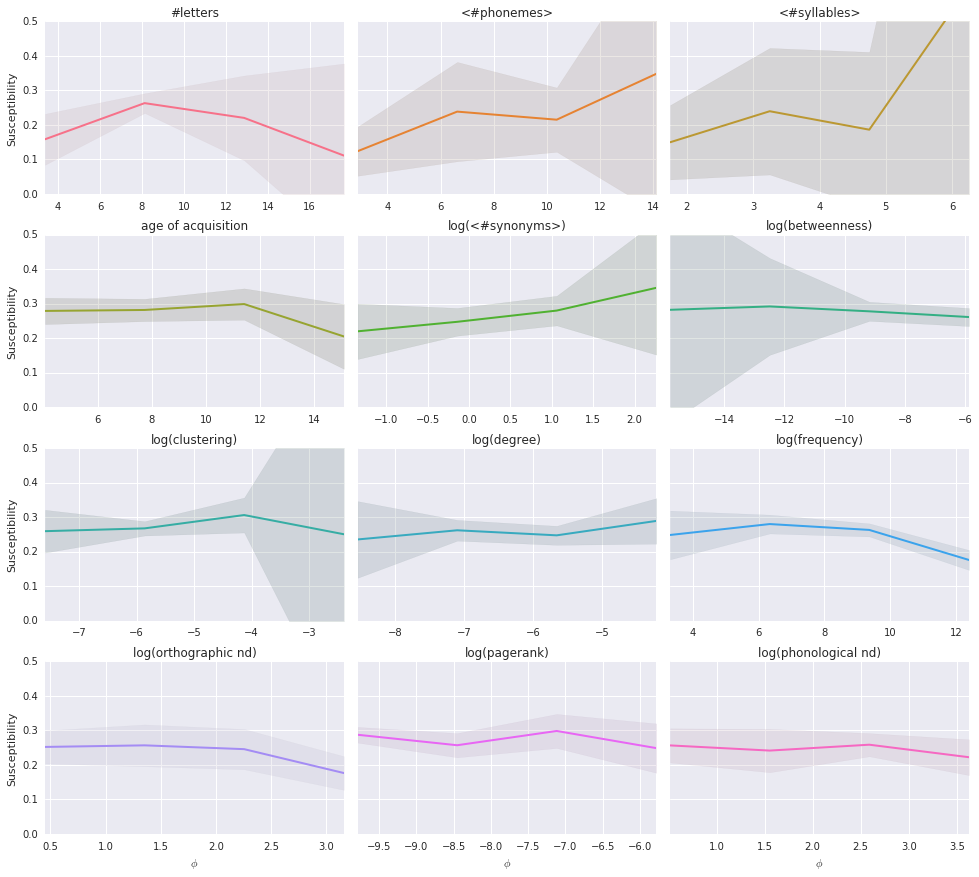

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

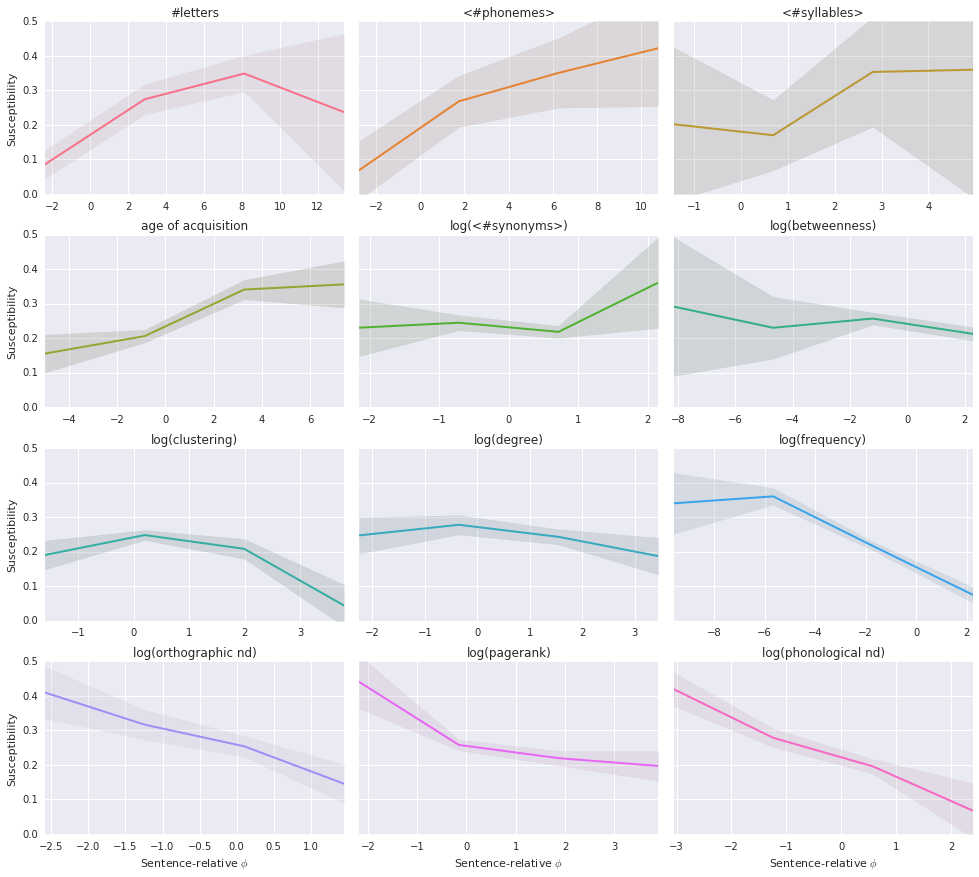

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

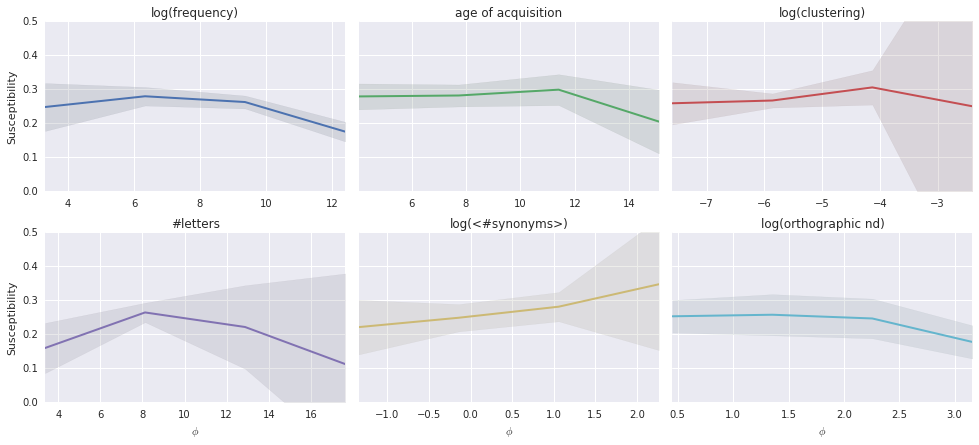

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

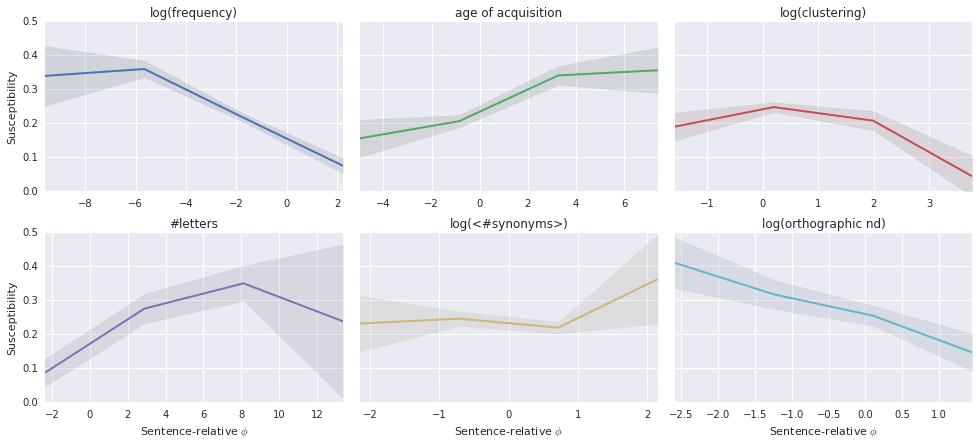

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

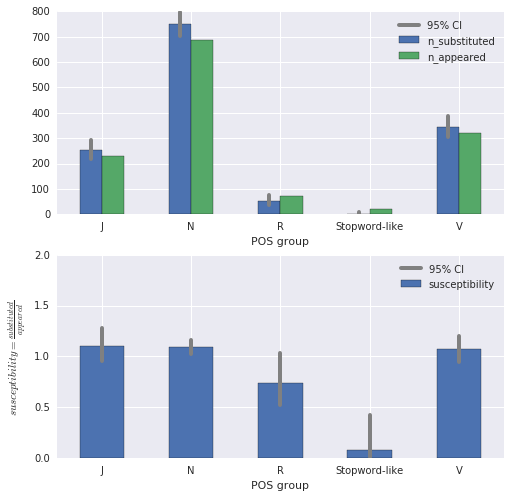

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['N', 'R', 'Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

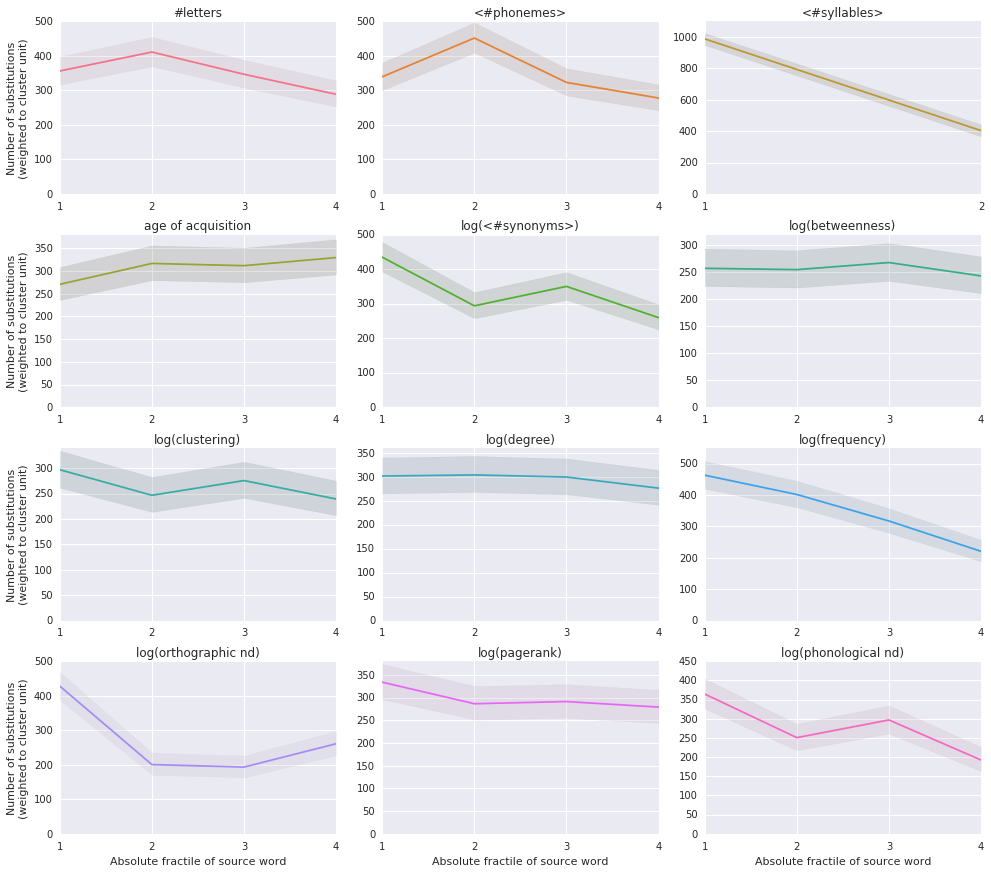

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

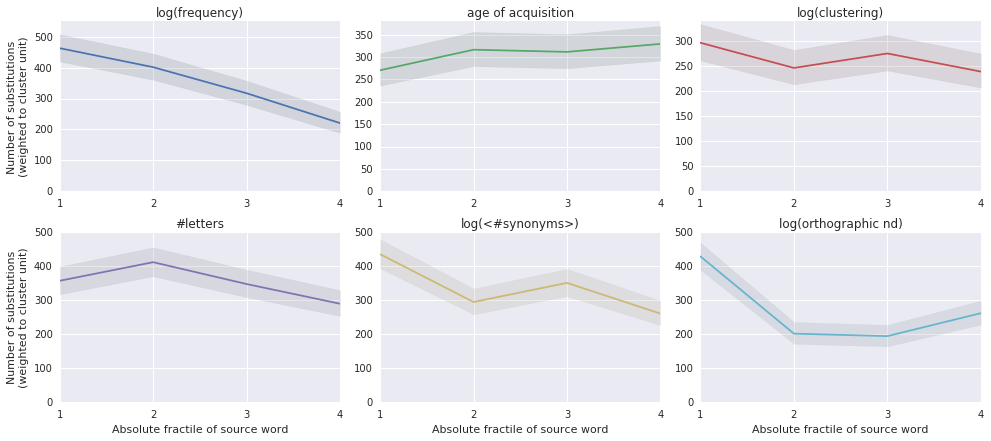

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (   84 of 13005) |                    | Elapsed Time: 0:00:01 ETA:  0:02:34

  1% (  163 of 13005) |                    | Elapsed Time: 0:00:02 ETA:  0:02:42

  1% (  234 of 13005) |                    | Elapsed Time: 0:00:03 ETA:  0:02:50

  2% (  310 of 13005) |                    | Elapsed Time: 0:00:04 ETA:  0:02:49

  2% (  326 of 13005) |                    | Elapsed Time: 0:00:04 ETA:  0:02:49

  2% (  388 of 13005) |                    | Elapsed Time: 0:00:05 ETA:  0:02:56

  3% (  460 of 13005) |                    | Elapsed Time: 0:00:06 ETA:  0:02:55

  3% (  488 of 13005) |                    | Elapsed Time: 0:00:06 ETA:  0:02:55

  4% (  553 of 13005) |                    | Elapsed Time: 0:00:07 ETA:  0:02:56

  4% (  618 of 13005) |                    | Elapsed Time: 0:00:08 ETA:  0:02:58

  5% (  651 of 13005) |#                   | Elapsed Time: 0:00:09 ETA:  0:03:02

  5% (  708 of 13005) |#                   | Elapsed Time: 0:00:10 ETA:  0:03:07

  6% (  786 of 13005) |#                   | Elapsed Time: 0:00:11 ETA:  0:03:05

  6% (  813 of 13005) |#                   | Elapsed Time: 0:00:11 ETA:  0:03:02

  6% (  896 of 13005) |#                   | Elapsed Time: 0:00:12 ETA:  0:02:53

  7% (  976 of 13005) |#                   | Elapsed Time: 0:00:13 ETA:  0:02:51

  8% ( 1044 of 13005) |#                   | Elapsed Time: 0:00:14 ETA:  0:02:50

  8% ( 1115 of 13005) |#                   | Elapsed Time: 0:00:15 ETA:  0:02:46

  8% ( 1138 of 13005) |#                   | Elapsed Time: 0:00:15 ETA:  0:02:45

  9% ( 1215 of 13005) |#                   | Elapsed Time: 0:00:17 ETA:  0:02:37

 10% ( 1301 of 13005) |##                  | Elapsed Time: 0:00:18 ETA:  0:02:37

 10% ( 1364 of 13005) |##                  | Elapsed Time: 0:00:19 ETA:  0:02:44

 11% ( 1436 of 13005) |##                  | Elapsed Time: 0:00:20 ETA:  0:02:43

 11% ( 1464 of 13005) |##                  | Elapsed Time: 0:00:20 ETA:  0:02:41

 11% ( 1550 of 13005) |##                  | Elapsed Time: 0:00:21 ETA:  0:02:34

 12% ( 1626 of 13005) |##                  | Elapsed Time: 0:00:22 ETA:  0:02:21

 13% ( 1708 of 13005) |##                  | Elapsed Time: 0:00:23 ETA:  0:02:18

 13% ( 1789 of 13005) |##                  | Elapsed Time: 0:00:23 ETA:  0:02:12

 14% ( 1869 of 13005) |##                  | Elapsed Time: 0:00:24 ETA:  0:02:11

 15% ( 1951 of 13005) |###                 | Elapsed Time: 0:00:25 ETA:  0:02:10

 15% ( 2036 of 13005) |###                 | Elapsed Time: 0:00:26 ETA:  0:02:04

 16% ( 2114 of 13005) |###                 | Elapsed Time: 0:00:27 ETA:  0:02:01

 16% ( 2194 of 13005) |###                 | Elapsed Time: 0:00:28 ETA:  0:02:01

 17% ( 2276 of 13005) |###                 | Elapsed Time: 0:00:29 ETA:  0:02:00

 18% ( 2362 of 13005) |###                 | Elapsed Time: 0:00:30 ETA:  0:02:04

 18% ( 2439 of 13005) |###                 | Elapsed Time: 0:00:31 ETA:  0:02:03

 19% ( 2514 of 13005) |###                 | Elapsed Time: 0:00:32 ETA:  0:02:06

 20% ( 2601 of 13005) |####                | Elapsed Time: 0:00:33 ETA:  0:02:06

 20% ( 2702 of 13005) |####                | Elapsed Time: 0:00:34 ETA:  0:02:01

 21% ( 2764 of 13005) |####                | Elapsed Time: 0:00:35 ETA:  0:01:57

 21% ( 2837 of 13005) |####                | Elapsed Time: 0:00:36 ETA:  0:01:58

 22% ( 2927 of 13005) |####                | Elapsed Time: 0:00:37 ETA:  0:01:58

 23% ( 3019 of 13005) |####                | Elapsed Time: 0:00:38 ETA:  0:01:54

 23% ( 3089 of 13005) |####                | Elapsed Time: 0:00:39 ETA:  0:01:53

 24% ( 3159 of 13005) |####                | Elapsed Time: 0:00:40 ETA:  0:01:57

 24% ( 3232 of 13005) |####                | Elapsed Time: 0:00:41 ETA:  0:02:04

 25% ( 3252 of 13005) |#####               | Elapsed Time: 0:00:42 ETA:  0:02:10

 25% ( 3321 of 13005) |#####               | Elapsed Time: 0:00:43 ETA:  0:02:11

 26% ( 3414 of 13005) |#####               | Elapsed Time: 0:00:43 ETA:  0:02:04

 26% ( 3507 of 13005) |#####               | Elapsed Time: 0:00:45 ETA:  0:02:00

 27% ( 3577 of 13005) |#####               | Elapsed Time: 0:00:45 ETA:  0:02:01

 28% ( 3664 of 13005) |#####               | Elapsed Time: 0:00:46 ETA:  0:01:54

 28% ( 3739 of 13005) |#####               | Elapsed Time: 0:00:47 ETA:  0:01:53

 29% ( 3822 of 13005) |#####               | Elapsed Time: 0:00:48 ETA:  0:01:49

 30% ( 3902 of 13005) |######              | Elapsed Time: 0:00:49 ETA:  0:01:46

 30% ( 3986 of 13005) |######              | Elapsed Time: 0:00:50 ETA:  0:01:43

 31% ( 4065 of 13005) |######              | Elapsed Time: 0:00:51 ETA:  0:01:43

 31% ( 4146 of 13005) |######              | Elapsed Time: 0:00:52 ETA:  0:01:45

 32% ( 4163 of 13005) |######              | Elapsed Time: 0:00:54 ETA:  0:02:07

 32% ( 4227 of 13005) |######              | Elapsed Time: 0:00:54 ETA:  0:02:13

 33% ( 4303 of 13005) |######              | Elapsed Time: 0:00:55 ETA:  0:02:14

 33% ( 4390 of 13005) |######              | Elapsed Time: 0:00:57 ETA:  0:02:19

 34% ( 4487 of 13005) |######              | Elapsed Time: 0:00:58 ETA:  0:02:13

 35% ( 4552 of 13005) |#######             | Elapsed Time: 0:00:58 ETA:  0:02:11

 35% ( 4638 of 13005) |#######             | Elapsed Time: 0:00:59 ETA:  0:02:04

 36% ( 4715 of 13005) |#######             | Elapsed Time: 0:01:00 ETA:  0:01:42

 36% ( 4804 of 13005) |#######             | Elapsed Time: 0:01:01 ETA:  0:01:34

 37% ( 4877 of 13005) |#######             | Elapsed Time: 0:01:02 ETA:  0:01:27

 38% ( 4975 of 13005) |#######             | Elapsed Time: 0:01:03 ETA:  0:01:21

 38% ( 5040 of 13005) |#######             | Elapsed Time: 0:01:04 ETA:  0:01:20

 39% ( 5119 of 13005) |#######             | Elapsed Time: 0:01:05 ETA:  0:01:23

 40% ( 5202 of 13005) |########            | Elapsed Time: 0:01:06 ETA:  0:01:21

 40% ( 5301 of 13005) |########            | Elapsed Time: 0:01:07 ETA:  0:01:17

 41% ( 5365 of 13005) |########            | Elapsed Time: 0:01:07 ETA:  0:01:12

 41% ( 5454 of 13005) |########            | Elapsed Time: 0:01:08 ETA:  0:01:11

 42% ( 5528 of 13005) |########            | Elapsed Time: 0:01:09 ETA:  0:01:11

 43% ( 5608 of 13005) |########            | Elapsed Time: 0:01:10 ETA:  0:01:15

 43% ( 5690 of 13005) |########            | Elapsed Time: 0:01:11 ETA:  0:01:16

 44% ( 5780 of 13005) |########            | Elapsed Time: 0:01:12 ETA:  0:01:15

 45% ( 5853 of 13005) |#########           | Elapsed Time: 0:01:13 ETA:  0:01:14

 45% ( 5935 of 13005) |#########           | Elapsed Time: 0:01:14 ETA:  0:01:14

 46% ( 6015 of 13005) |#########           | Elapsed Time: 0:01:15 ETA:  0:01:16

 46% ( 6102 of 13005) |#########           | Elapsed Time: 0:01:16 ETA:  0:01:17

 47% ( 6178 of 13005) |#########           | Elapsed Time: 0:01:17 ETA:  0:01:15

 48% ( 6269 of 13005) |#########           | Elapsed Time: 0:01:18 ETA:  0:01:13

 48% ( 6340 of 13005) |#########           | Elapsed Time: 0:01:19 ETA:  0:01:12

 49% ( 6434 of 13005) |#########           | Elapsed Time: 0:01:20 ETA:  0:01:09

 50% ( 6503 of 13005) |##########          | Elapsed Time: 0:01:21 ETA:  0:01:08

 50% ( 6588 of 13005) |##########          | Elapsed Time: 0:01:22 ETA:  0:01:06

 51% ( 6666 of 13005) |##########          | Elapsed Time: 0:01:23 ETA:  0:01:05

 51% ( 6762 of 13005) |##########          | Elapsed Time: 0:01:24 ETA:  0:01:01

 52% ( 6828 of 13005) |##########          | Elapsed Time: 0:01:24 ETA:  0:01:02

 53% ( 6910 of 13005) |##########          | Elapsed Time: 0:01:25 ETA:  0:01:04

 53% ( 6991 of 13005) |##########          | Elapsed Time: 0:01:26 ETA:  0:01:04

 54% ( 7075 of 13005) |##########          | Elapsed Time: 0:01:27 ETA:  0:01:02

 55% ( 7153 of 13005) |###########         | Elapsed Time: 0:01:28 ETA:  0:01:03

 55% ( 7248 of 13005) |###########         | Elapsed Time: 0:01:29 ETA:  0:01:01

 56% ( 7316 of 13005) |###########         | Elapsed Time: 0:01:30 ETA:  0:01:01

 56% ( 7412 of 13005) |###########         | Elapsed Time: 0:01:31 ETA:  0:00:58

 57% ( 7478 of 13005) |###########         | Elapsed Time: 0:01:32 ETA:  0:00:58

 58% ( 7570 of 13005) |###########         | Elapsed Time: 0:01:33 ETA:  0:00:54

 58% ( 7641 of 13005) |###########         | Elapsed Time: 0:01:34 ETA:  0:00:50

 59% ( 7732 of 13005) |###########         | Elapsed Time: 0:01:35 ETA:  0:00:47

 60% ( 7803 of 13005) |############        | Elapsed Time: 0:01:35 ETA:  0:00:46

 60% ( 7886 of 13005) |############        | Elapsed Time: 0:01:36 ETA:  0:00:46

 61% ( 7966 of 13005) |############        | Elapsed Time: 0:01:37 ETA:  0:00:43

 61% ( 8059 of 13005) |############        | Elapsed Time: 0:01:38 ETA:  0:00:40

 62% ( 8129 of 13005) |############        | Elapsed Time: 0:01:39 ETA:  0:00:41

 63% ( 8225 of 13005) |############        | Elapsed Time: 0:01:40 ETA:  0:00:39

 63% ( 8291 of 13005) |############        | Elapsed Time: 0:01:41 ETA:  0:00:39

 64% ( 8380 of 13005) |############        | Elapsed Time: 0:01:42 ETA:  0:00:41

 65% ( 8454 of 13005) |#############       | Elapsed Time: 0:01:42 ETA:  0:00:38

 65% ( 8546 of 13005) |#############       | Elapsed Time: 0:01:43 ETA:  0:00:36

 66% ( 8616 of 13005) |#############       | Elapsed Time: 0:01:44 ETA:  0:00:34

 66% ( 8701 of 13005) |#############       | Elapsed Time: 0:01:45 ETA:  0:00:37

 67% ( 8779 of 13005) |#############       | Elapsed Time: 0:01:46 ETA:  0:00:39

 68% ( 8863 of 13005) |#############       | Elapsed Time: 0:01:47 ETA:  0:00:40

 68% ( 8941 of 13005) |#############       | Elapsed Time: 0:01:48 ETA:  0:00:39

 69% ( 9025 of 13005) |#############       | Elapsed Time: 0:01:49 ETA:  0:00:39

 70% ( 9104 of 13005) |##############      | Elapsed Time: 0:01:50 ETA:  0:00:41

 70% ( 9199 of 13005) |##############      | Elapsed Time: 0:01:51 ETA:  0:00:40

 71% ( 9267 of 13005) |##############      | Elapsed Time: 0:01:52 ETA:  0:00:39

 71% ( 9350 of 13005) |##############      | Elapsed Time: 0:01:53 ETA:  0:00:39

 72% ( 9429 of 13005) |##############      | Elapsed Time: 0:01:54 ETA:  0:00:36

 73% ( 9510 of 13005) |##############      | Elapsed Time: 0:01:55 ETA:  0:00:36

 73% ( 9592 of 13005) |##############      | Elapsed Time: 0:01:56 ETA:  0:00:34

 74% ( 9687 of 13005) |##############      | Elapsed Time: 0:01:57 ETA:  0:00:32

 75% ( 9754 of 13005) |###############     | Elapsed Time: 0:01:57 ETA:  0:00:30

 75% ( 9841 of 13005) |###############     | Elapsed Time: 0:01:58 ETA:  0:00:29

 76% ( 9917 of 13005) |###############     | Elapsed Time: 0:01:59 ETA:  0:00:29

 76% (10008 of 13005) |###############     | Elapsed Time: 0:02:00 ETA:  0:00:28

 77% (10079 of 13005) |###############     | Elapsed Time: 0:02:01 ETA:  0:00:26

 78% (10171 of 13005) |###############     | Elapsed Time: 0:02:02 ETA:  0:00:24

 78% (10242 of 13005) |###############     | Elapsed Time: 0:02:03 ETA:  0:00:20

 79% (10325 of 13005) |###############     | Elapsed Time: 0:02:04 ETA:  0:00:21

 80% (10404 of 13005) |################    | Elapsed Time: 0:02:05 ETA:  0:00:21

 80% (10494 of 13005) |################    | Elapsed Time: 0:02:06 ETA:  0:00:19

 81% (10567 of 13005) |################    | Elapsed Time: 0:02:06 ETA:  0:00:17

 81% (10658 of 13005) |################    | Elapsed Time: 0:02:08 ETA:  0:00:16

 82% (10730 of 13005) |################    | Elapsed Time: 0:02:08 ETA:  0:00:16

 83% (10808 of 13005) |################    | Elapsed Time: 0:02:10 ETA:  0:00:33

 83% (10892 of 13005) |################    | Elapsed Time: 0:02:11 ETA:  0:00:34

 84% (10978 of 13005) |################    | Elapsed Time: 0:02:12 ETA:  0:00:35

 85% (11055 of 13005) |#################   | Elapsed Time: 0:02:13 ETA:  0:00:33

 85% (11152 of 13005) |#################   | Elapsed Time: 0:02:14 ETA:  0:00:30

 86% (11217 of 13005) |#################   | Elapsed Time: 0:02:15 ETA:  0:00:28

 86% (11301 of 13005) |#################   | Elapsed Time: 0:02:16 ETA:  0:00:28

 87% (11380 of 13005) |#################   | Elapsed Time: 0:02:17 ETA:  0:00:28

 88% (11469 of 13005) |#################   | Elapsed Time: 0:02:18 ETA:  0:00:26

 88% (11542 of 13005) |#################   | Elapsed Time: 0:02:19 ETA:  0:00:08

 89% (11626 of 13005) |#################   | Elapsed Time: 0:02:20 ETA:  0:00:08

 90% (11705 of 13005) |##################  | Elapsed Time: 0:02:21 ETA:  0:00:07

 90% (11798 of 13005) |##################  | Elapsed Time: 0:02:22 ETA:  0:00:07

 91% (11868 of 13005) |##################  | Elapsed Time: 0:02:22 ETA:  0:00:10

 92% (11967 of 13005) |##################  | Elapsed Time: 0:02:23 ETA:  0:00:06

 92% (12030 of 13005) |##################  | Elapsed Time: 0:02:24 ETA:  0:00:04

 93% (12121 of 13005) |##################  | Elapsed Time: 0:02:25 ETA:  0:00:03

 93% (12193 of 13005) |##################  | Elapsed Time: 0:02:26 ETA:  0:00:00

 94% (12283 of 13005) |##################  | Elapsed Time: 0:02:27 ETA:  0:00:00

 95% (12355 of 13005) |################### | Elapsed Time: 0:02:28 ETA:  0:00:00

 95% (12446 of 13005) |################### | Elapsed Time: 0:02:29 ETA:  0:00:00

 96% (12518 of 13005) |################### | Elapsed Time: 0:02:30 ETA:  0:00:00

 97% (12615 of 13005) |################### | Elapsed Time: 0:02:31 ETA:  0:00:00

 97% (12680 of 13005) |################### | Elapsed Time: 0:02:31 ETA:  0:00:00

 98% (12762 of 13005) |################### | Elapsed Time: 0:02:32 ETA:  0:00:00

 98% (12843 of 13005) |################### | Elapsed Time: 0:02:33 ETA:  0:00:00

 99% (12942 of 13005) |################### | Elapsed Time: 0:02:34 ETA:  0:00:00

100% (13005 of 13005) |####################| Elapsed Time: 0:02:35 Time: 0:02:35


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

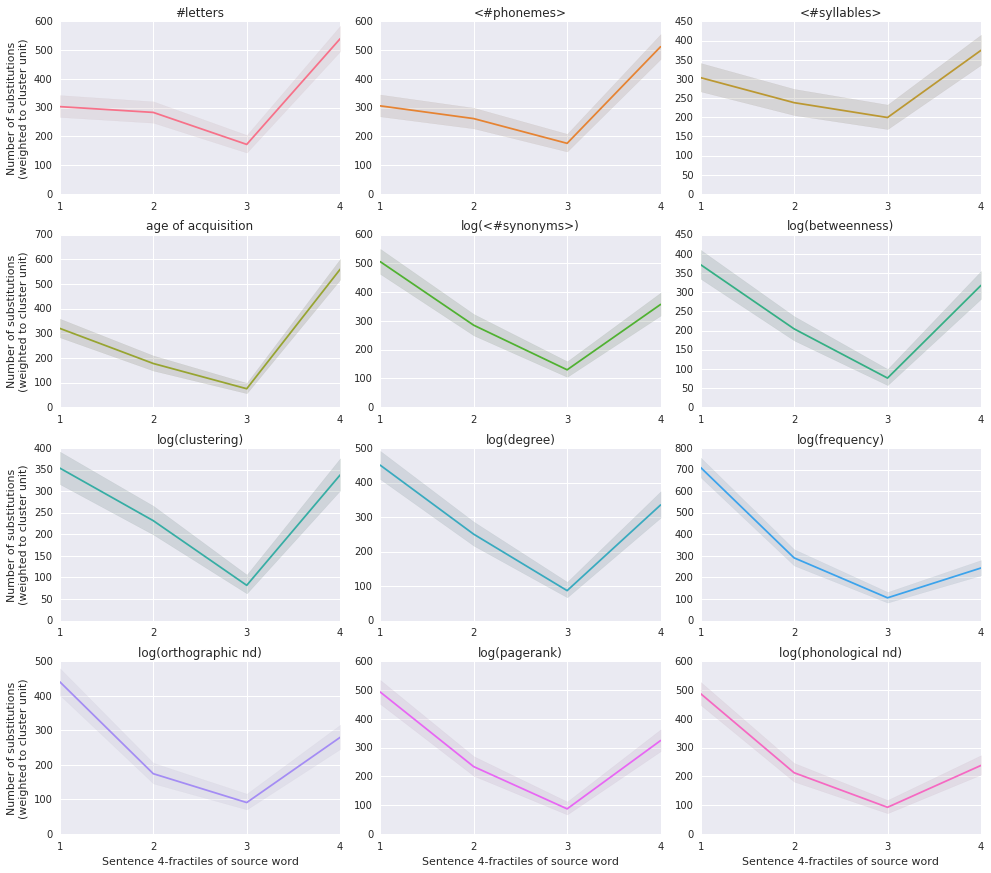

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

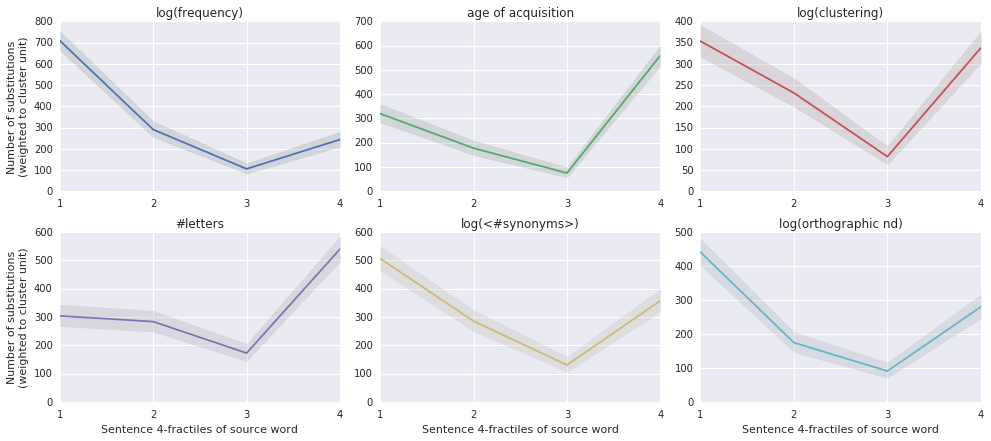

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)